## Do all pip/conda installs from inside the Notebook, when complete you can comment those lines out

In [1]:
import sys
sys.executable

'/anaconda2/bin/python'

In [6]:
!/anaconda2/bin/conda list
#!/anaconda2/bin/pip install

# packages in environment at /anaconda2:
#
abstract-rendering        0.5.1               np110py27_0  
alabaster                 0.7.8                    py27_0  
anaconda-client           1.4.0                    py27_0  
anaconda                  custom                   py27_0  
anaconda-navigator        1.1.1                    py27_0  
argcomplete               1.0.0                    py27_1  
astropy                   1.1.2               np110py27_0  
babel                     2.3.3                    py27_0  
backports                 1.0                      py27_0  
backports_abc             0.4                      py27_0  
basemap                   1.0.7               np110py27_0  
bcolz                     1.0.0                    py27_0  
beautiful-soup            4.3.2                    py27_0  
beautifulsoup4            4.4.1                    py27_0  
binstar                   0.12                          2  
biopython                 1.67                np110py27_0

## python path

In [1]:
import sys
sys.path

['',
 '/anaconda2/lib/python27.zip',
 '/anaconda2/lib/python2.7',
 '/anaconda2/lib/python2.7/plat-linux2',
 '/anaconda2/lib/python2.7/lib-tk',
 '/anaconda2/lib/python2.7/lib-old',
 '/anaconda2/lib/python2.7/lib-dynload',
 '/global/homes/k/kaylanb/.local/lib/python2.7/site-packages',
 '/anaconda2/lib/python2.7/site-packages',
 '/anaconda2/lib/python2.7/site-packages/Sphinx-1.4.1-py2.7.egg',
 '/anaconda2/lib/python2.7/site-packages/setuptools-23.0.0-py2.7.egg',
 '/anaconda2/lib/python2.7/site-packages/IPython/extensions',
 '/global/u2/k/kaylanb/.ipython']

In [2]:
sys.path.append('/project/projectdirs/desi/users/burleigh/theValidator_root/repo/legacypipe/py')
sys.path

['',
 '/anaconda2/lib/python27.zip',
 '/anaconda2/lib/python2.7',
 '/anaconda2/lib/python2.7/plat-linux2',
 '/anaconda2/lib/python2.7/lib-tk',
 '/anaconda2/lib/python2.7/lib-old',
 '/anaconda2/lib/python2.7/lib-dynload',
 '/global/homes/k/kaylanb/.local/lib/python2.7/site-packages',
 '/anaconda2/lib/python2.7/site-packages',
 '/anaconda2/lib/python2.7/site-packages/Sphinx-1.4.1-py2.7.egg',
 '/anaconda2/lib/python2.7/site-packages/setuptools-23.0.0-py2.7.egg',
 '/anaconda2/lib/python2.7/site-packages/IPython/extensions',
 '/global/u2/k/kaylanb/.ipython',
 '/project/projectdirs/desi/users/burleigh/theValidator_root/repo/legacypipe/py']

# Code

In [3]:
%matplotlib inline
from __future__ import division, print_function

import matplotlib.pyplot as plt
import os
import sys
import pickle

from legacyanalysis.validation.combine_cats import get_matched_dataset
import legacyanalysis.validation.common_plots as plots

/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
!mkdir /global/homes/k/kaylanb/validation
!rsync -Larv /project/projectdirs/desi/users/burleigh/theValidator_root/pickles/validation/* validation/

mkdir: cannot create directory `/global/homes/k/kaylanb/validation': File exists
sending incremental file list

sent 97 bytes  received 13 bytes  220.00 bytes/sec
total size is 4704762  speedup is 42770.56


In [4]:
os.environ["VALIDATION_DIR"]='/global/homes/k/kaylanb/validation'
os.environ

{'LANG': 'en_US.UTF-8', 'TERM': 'xterm-color', 'SHELL': '/bin/bash', 'JPY_PARENT_PID': '39454', 'VALIDATION_DIR': '/global/homes/k/kaylanb/validation', 'CLICOLOR': '1', 'USER': 'kaylanb', 'HOME': '/global/homes/k/kaylanb', 'PATH': '/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/root/bin:/anaconda3/bin/', 'PAGER': 'cat', 'GIT_PAGER': 'cat'}

In [5]:
indir='/project/projectdirs/desi/users/burleigh/theValidator_root/input_data/bass-mosaic-decals'
decam=os.path.join(indir,'decam.txt')
bass_mzls=os.path.join(indir,'bassmos.txt')
d= get_matched_dataset(decam, bass_mzls, \
                       comparison='bmd',debug=False)

# Plots

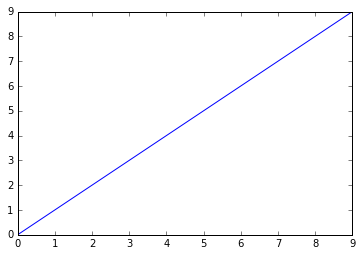

In [9]:
plt.plot(range(10))

## All matched objects

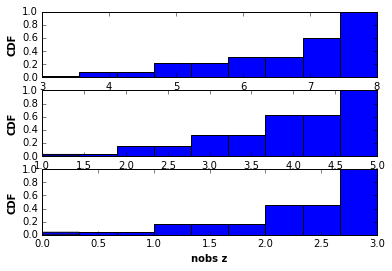

In [7]:
d.apply_cut(['all'])
plots.nobs(d.ref.data['tractor'], show=True) #outname=os.path.join(d.outdir,'radec_decals.png')

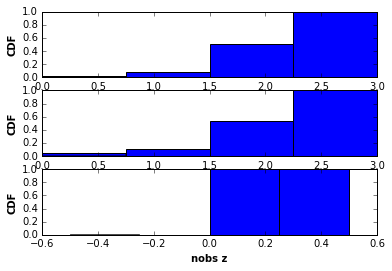

In [8]:
plots.nobs(d.test.data['tractor'], show=True)

## PSF and "clean photometry" 

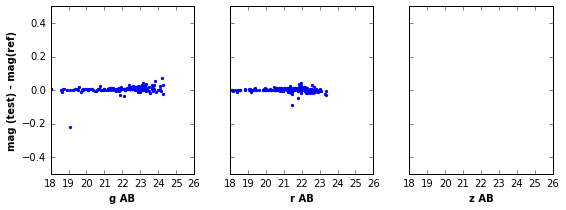

In [13]:
plots.delta_mag_vs_mag(d.ref.data['extra'],d.test.data['extra'], ylim=[-0.5,0.5],\
                       show=True)

/project/projectdirs/desi/users/burleigh/theValidator_root/repo/legacypipe/py/legacyanalysis/validation/common_plots.py:257: RuntimeWarning: divide by zero encountered in power
  np.power(test_tractor['decam_flux_ivar'][:,iband],-1))
/project/projectdirs/desi/users/burleigh/theValidator_root/repo/legacypipe/py/legacyanalysis/validation/common_plots.py:256: RuntimeWarning: divide by zero encountered in power
  np.sqrt( np.power(ref_tractor['decam_flux_ivar'][:,iband],-1)+\


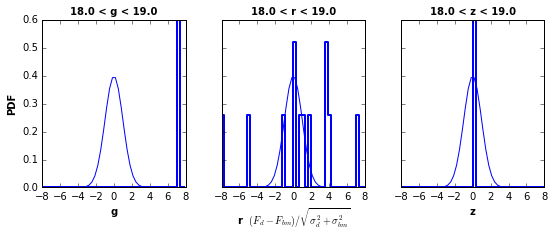

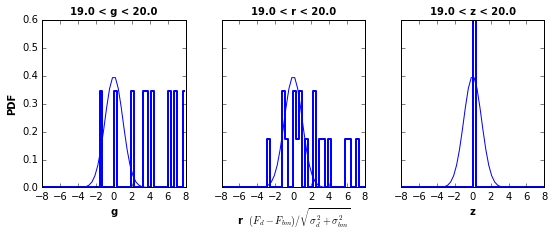

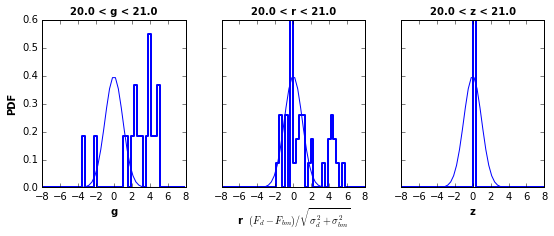

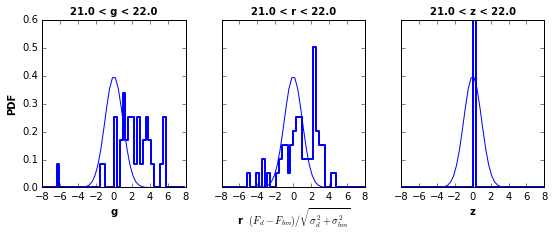

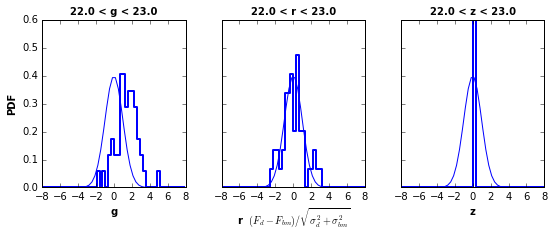

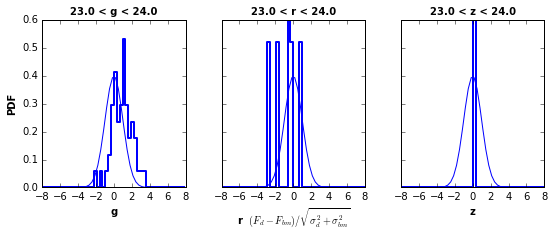

In [14]:
plots.chi_v_gaussian(d.ref.data['tractor'],d.test.data['tractor'],\
                     d.ref.data['extra'],d.test.data['extra'],\
                     low=-8.,hi=8., show=True)

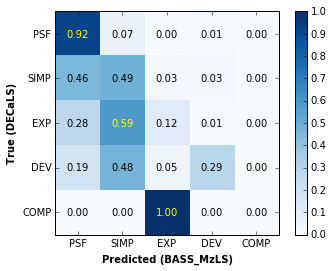

In [12]:
d.apply_cut(['clean'])
plots.confusion_matrix(d.ref.data['tractor'],d.test.data['tractor'],\
                       ref_name='DECaLS',test_name='BASS_MzLS',show=True)

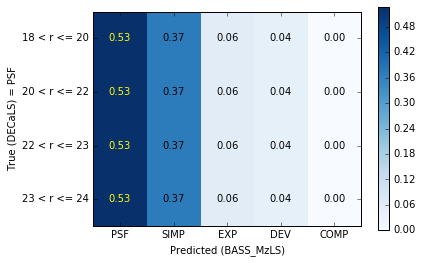

In [15]:
plots.stacked_confusion_matrix(d.ref.data['tractor'],d.test.data['tractor'],\
                               d.ref.data['extra'],d.test.data['extra'],\
                               ref_name='DECaLS',test_name='BASS_MzLS',\
                               show=True)
